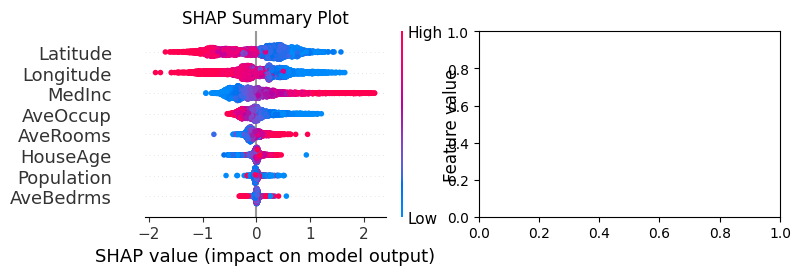

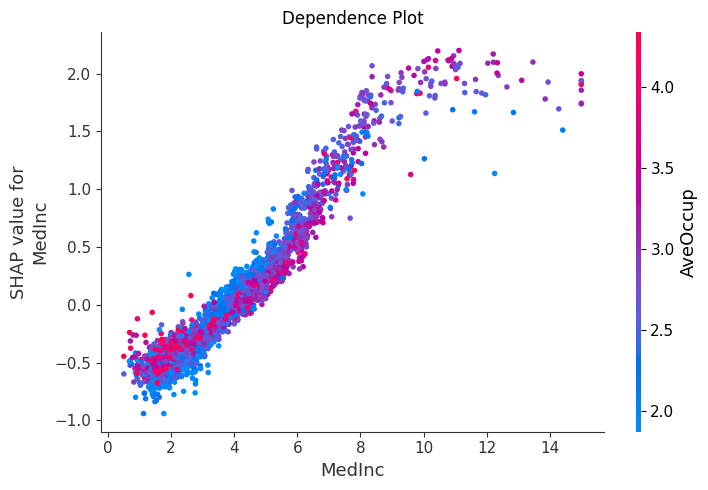

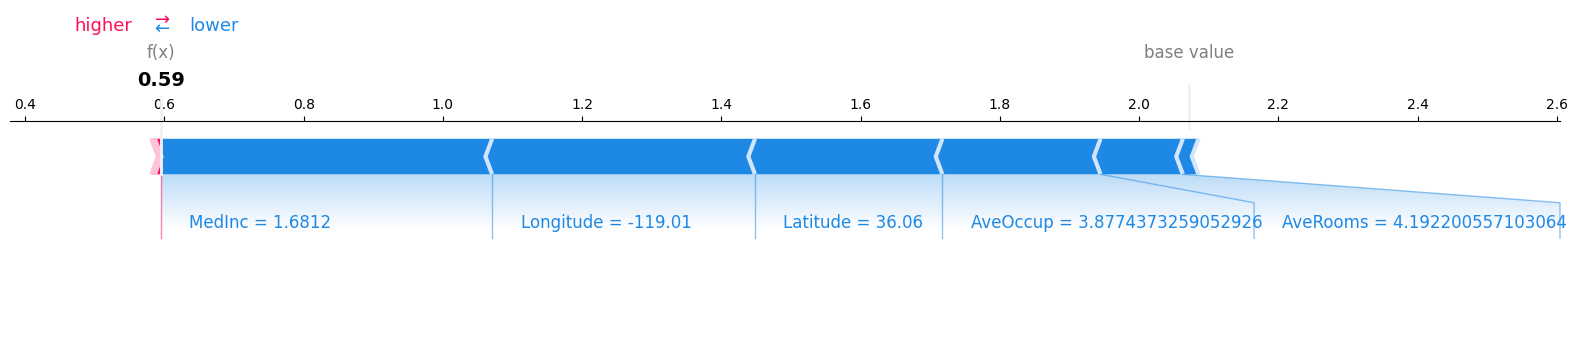

In [1]:
!pip install shap xgboost

import shap
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# SHAP explanation
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Create various SHAP plots
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
shap.summary_plot(shap_values, X_test, show=False)
plt.title('SHAP Summary Plot')

plt.subplot(2, 2, 2)
shap.dependence_plot("MedInc", shap_values, X_test, show=False)
plt.title('Dependence Plot')

plt.tight_layout()
plt.show()

# Force plot for individual prediction
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:], matplotlib=True)